#Exploratory Data Analysis

In [3]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
from tqdm import tqdm
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [4]:
ultimatedf = pd.read_csv('final_table.csv')

In [5]:
ultimatedf = ultimatedf.drop('Unnamed: 0', axis=1)
resp=ultimatedf.bp_w + ultimatedf.ml_w + ultimatedf.fl_w + ultimatedf.ms_w + ultimatedf.fs_w
ultimatedf['best_pic_w'] = ultimatedf['bp_w']
ultimatedf['bp_w'] = resp

There are 1138 movies in our dataframe. These are all the movies nominated and won in 1st to 87th Oscars. Note that we took out movies with run time 0 minute.

In [6]:
ultimatedf.head()

,imdbID,Title,Released,Director,Actors,Country,Language,Rated,Runtime,Year,imdbRating,imdbVotes,tomatoConsensus,tomatoFresh,tomatoMeter,tomatoRating,tomatoReviews,tomatoRotten,tomatoUserMeter,tomatoUserRating,tomatoUserReviews,Nominated Oscars,Won Oscars,Othter wins,Othter nominations,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,bp_n,bp_w,fl_n,fl_w,fs_n,fs_w,ml_n,ml_w,ms_n,ms_w,movie_url,imdb_link,rt_link,budget_USD,box_USD,A_mean_age,A_mean_credit,D_mean_age,D_mean_credit,mean_rate,Anominated,Awon,Dnominated,Dwon,best_pic_w
0,tt0018389,A Ship Comes In,1928-01-04 00:00:00,William K. Howard,Rudolph Schildkraut,USA,NaN,NaN,70,1928,5.8,88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,True,False,False,False,False,False,False,False,/wiki/A_Ship_Comes_In,http://www.imdb.com/title/tt0018389/,NaN,NaN,69308274.8538,54.870204,38.000000,34.548939,54,5.8,1,0,0,0,False
1,tt0018389,A Ship Comes In,1928-01-04 00:00:00,William K. Howard,Louise Dresser,USA,NaN,NaN,70,1928,5.8,88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,True,False,False,False,False,False,False,False,/wiki/A_Ship_Comes_In,http://www.imdb.com/title/tt0018389/,NaN,NaN,69308274.8538,54.870204,38.000000,34.548939,54,5.8,1,0,0,0,False
2,tt0018515,Two Arabian Knights,1927-09-23 00:00:00,Lewis Milestone,William Boyd,USA,English,TV-G,92,1927,7.0,505,NaN,NaN,NaN,NaN,NaN,NaN,71,3.8,124,0,0,0,0,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,0,False,False,False,False,False,False,False,False,/wiki/Two_Arabian_Knights,http://www.imdb.com/title/tt0018515/,NaN,NaN,91438583.1532,29.918217,117.666667,31.978097,52,7.3,0,1,0,2,False
3,tt0018515,Two Arabian Knights,1927-09-23 00:00:00,Lewis Milestone,Mary Astor,USA,English,TV-G,92,1927,7.0,505,NaN,NaN,NaN,NaN,NaN,NaN,71,3.8,124,0,0,0,0,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,0,False,False,False,False,False,False,False,False,/wiki/Two_Arabian_Knights,http://www.imdb.com/title/tt0018515/,NaN,NaN,91438583.1532,29.918217,117.666667,31.978097,52,7.3,0,1,0,2,False
4,tt0018515,Two Arabian Knights,1927-09-23 00:00:00,Lewis Milestone,Louis Wolheim,USA,English,TV-G,92,1927,7.0,505,NaN,NaN,NaN,NaN,NaN,NaN,71,3.8,124,0,0,0,0,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,0,False,False,False,False,False,False,False,False,/wiki/Two_Arabian_Knights,http://www.imdb.com/title/tt0018515/,NaN,NaN,91438583.1532,29.918217,117.666667,31.978097,52,7.3,0,1,0,2,False


We start our analysis by making some plots.

Here we plot a histogram of the movie run times. **Fig.1** shows the the histogram of the runtime of all movies. the blue marks where the mean is and the green labels where the median is. We also print out the mean and median, which is 118.73 and 115. Movie run time ranges from around 60 to 240 minutes. Note that we have discarded movies with runtime 0 minue. These deleted entries are mostly old movies from the early 20th centry without sufficient information.

119.661235955 116.0


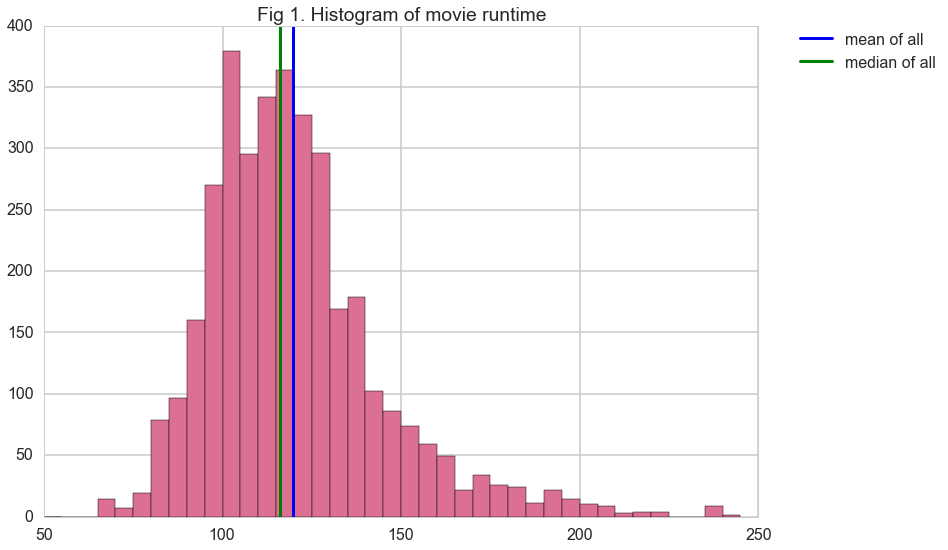

In [7]:
plt.hist(ultimatedf.Runtime, color='palevioletred',bins=np.arange(50,250,5));
plt.title('Fig 1. Histogram of movie runtime');
plt.axvline(np.mean(ultimatedf.Runtime), color='b', linewidth=3, label='mean of all')
plt.axvline(np.median(ultimatedf.Runtime), color='g', linewidth=3, label='median of all');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
print np.mean(ultimatedf.Runtime), np.median(ultimatedf.Runtime)

Then we plot histograms of the runtime for winning movies and nominees. 

To better compare the two distributions, we layer them in a single plot in **fig 2**. We also plot the mean and median of each group. The mean of nominees is 24 minutes less than the mean of the winners. The median of the nominees is 14 minutes less than that of the winners. Though the mean and median are different in each group, we cannot tell if movie runtime is a feature that explicitly divides the winners from the nominees because the distributions are very much overlapped. Note that the green shows the runtime of the nominees and the red shows the runtime of the winners. There are much more nominees than the winners, which is why the distribution of the nominees are higher than that of the winners.

In [8]:
print np.mean(ultimatedf[ultimatedf.bp_w==False]['Runtime'].values), np.median(ultimatedf[ultimatedf.bp_w==False]['Runtime'].values)
print np.mean(ultimatedf[ultimatedf.bp_w==True]['Runtime'].values), np.median(ultimatedf[ultimatedf.bp_w==True]['Runtime'].values)       

117.891023128 115.0
123.481216458 120.0


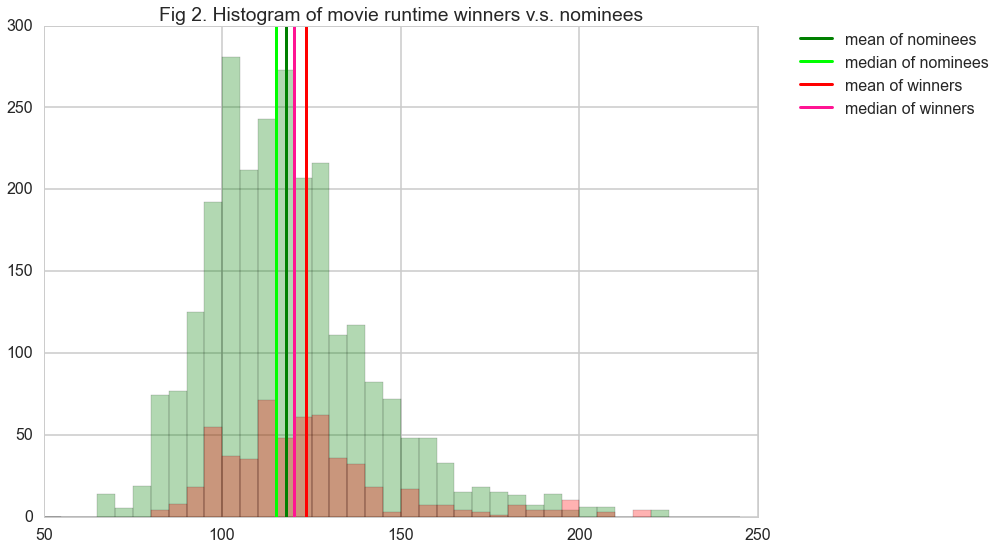

In [9]:

plt.hist(ultimatedf[ultimatedf.bp_w==False]['Runtime'].values, color='g',bins=np.arange(50,250,5), alpha=0.3)
plt.hist(ultimatedf[ultimatedf.bp_w==True]['Runtime'].values, color='r',bins=np.arange(50,250,5), alpha=0.3)
plt.title('Fig 2. Histogram of movie runtime winners v.s. nominees');
plt.axvline(np.mean(ultimatedf[ultimatedf.bp_w==False]['Runtime'].values), color='g', linewidth=3, label='mean of nominees')
plt.axvline(np.median(ultimatedf[ultimatedf.bp_w==False]['Runtime'].values), color='lime', linewidth=3, label='median of nominees');
plt.axvline(np.mean(ultimatedf[ultimatedf.bp_w==True]['Runtime'].values), color='r', linewidth=3, label='mean of winners')
plt.axvline(np.median(ultimatedf[ultimatedf.bp_w==True]['Runtime'].values), color='deeppink', linewidth=3, label='median of winners');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


Next, we plot the histogram of box office. **Fig 3** shows the box office of all movies. Due to the long tail on the right, we cannot see much information from our histogram, therefore we zoom in to all the movies with box office less than 1 billion to see what is going on there. **Fig 4** shows the box office of all movies with box office less than 1 billion. We see that most movies have box office less than 100 million USD. 

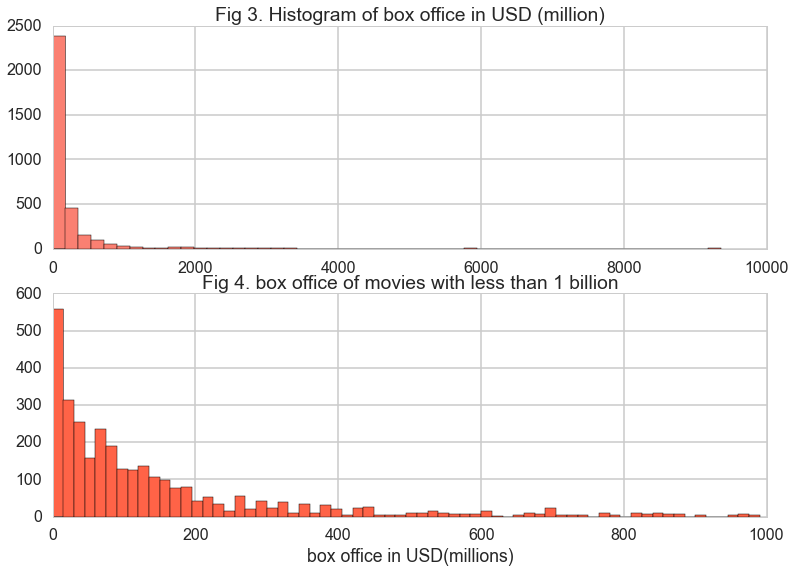

In [10]:
plt.figure(1)
plt.subplot(211)
dt = ultimatedf.box_USD.dropna().values/1000000
binwidth = 180
plt.hist(dt, bins=np.arange(min(dt), max(dt) + binwidth, binwidth), color='salmon');
#plt.axvline(np.mean(ultimatedf.box_USD.dropna())/1000000, color='b', linewidth=3, label='mean')
#plt.axvline(np.median(ultimatedf.box_USD.dropna())/1000000, color='g', linewidth=3, label='median')
plt.title('Fig 3. Histogram of box office in USD (million)');

plt.subplot(212)
dt = ultimatedf.box_USD.dropna().values/1000000
binwidth = 15
dt_1=dt[dt<=1000]
plt.hist(dt_1, bins=np.arange(min(dt_1), max(dt_1) + binwidth, binwidth), color='tomato');
#plt.axvline(np.mean(ultimatedf.box_USD.dropna())/1000000, color='b', linewidth=3, label='mean')
#plt.axvline(np.median(ultimatedf.box_USD.dropna())/1000000, color='g', linewidth=3, label='median')
plt.title('Fig 4. box office of movies with less than 1 billion');
plt.xlabel('box office in USD(millions)');


Now we compare the box office of the two different groups of movies, the winners and the nominees. **Fig 5** shows the box office of winners in green and the box office of nominees in red. **Fig 6** shows similar information, only with all movies with box office less than 1 billion. Not much new information can be gathered from these two graphs because the winning observations are so few.

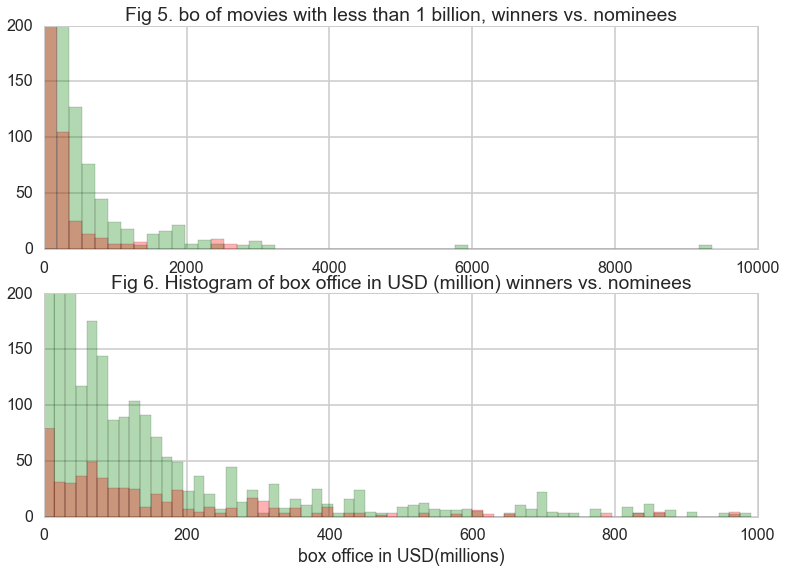

In [13]:
plt.figure(1)
plt.subplot(211)

dt = ultimatedf[ultimatedf.bp_w==False]['box_USD'].dropna().values/1000000
dt_1 = ultimatedf[ultimatedf.bp_w==True]['box_USD'].dropna().values/1000000
binwidth = 180
plt.hist(dt, bins=np.arange(min(dt), max(dt) + binwidth, binwidth), color='g', alpha=0.3);
plt.hist(dt_1, bins=np.arange(min(dt), max(dt) + binwidth, binwidth), color='r', alpha=0.3);
plt.ylim([0, 200]);
#plt.axvline(np.mean(ultimatedf.box_USD.dropna())/1000000, color='b', linewidth=3, label='mean')
#plt.axvline(np.median(ultimatedf.box_USD.dropna())/1000000, color='g', linewidth=3, label='median')
plt.title('Fig 5. bo of movies with less than 1 billion, winners vs. nominees');

plt.subplot(212)
dt_3=dt_1[dt_1<=1000]
dt_2=dt[dt<=1000]
binwidth = 180
binwidth_1 = 15
#plt.hist(dt, bins=np.arange(min(dt), max(dt) + binwidth, binwidth), color='g', alpha=0.3);
plt.ylim([0, 200])
plt.hist(dt_2, bins=np.arange(min(dt_2), max(dt_2) + binwidth_1, binwidth_1), color='g', alpha=0.3)
plt.hist(dt_3, bins=np.arange(min(dt_2), max(dt_2) + binwidth_1, binwidth_1), color='r', alpha=0.3)

#plt.axvline(np.mean(ultimatedf.box_USD.dropna())/1000000, color='b', linewidth=3, label='mean')
#plt.axvline(np.median(ultimatedf.box_USD.dropna())/1000000, color='g', linewidth=3, label='median')
plt.title('Fig 6. Histogram of box office in USD (million) winners vs. nominees');
plt.xlabel('box office in USD(millions)');

Then we look at the budget of the movies. **Fig 7** shows the budget of all movies. Due to the long tail on the right, we cannot see much information from our histogram, therefore we zoom in to all the movies with budget less than 100 million to see what is going on there. **Fig 8** shows the budget of all movies with budget less than 100 million. Most of the movies have less than 30 million budget.

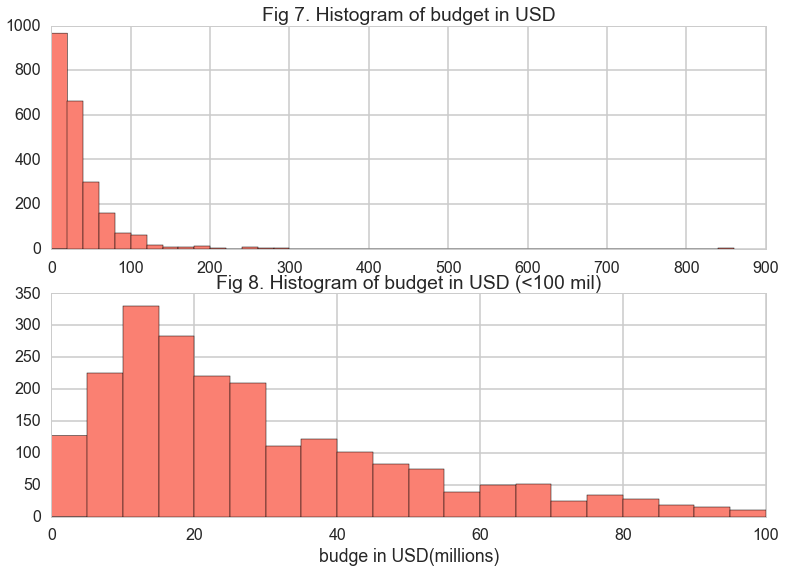

In [14]:
plt.figure(1)
plt.subplot(211)

dt = ultimatedf.budget_USD.dropna().values/1000000
binwidth = 20
plt.hist(dt, bins=np.arange(min(dt), max(dt) + binwidth, binwidth), color='salmon');
plt.title('Fig 7. Histogram of budget in USD');

plt.subplot(212)
binwidth = 5
dt_1=dt[dt<=100]
plt.hist(dt, bins=np.arange(min(dt_1), max(dt_1) + binwidth, binwidth), color='salmon');
plt.title('Fig 8. Histogram of budget in USD (<100 mil)');


plt.xlabel('budge in USD(millions)');


Now we compare the winners and the nominees. **Fig 9** show all winning and nominees' budgets. Note we keep our convension of using green for the nominees and red for the winners. **Fig10** shows all movies with budgets less than 100 million. We still cannot distinguish winners from nominees solely from looking at their budgets.

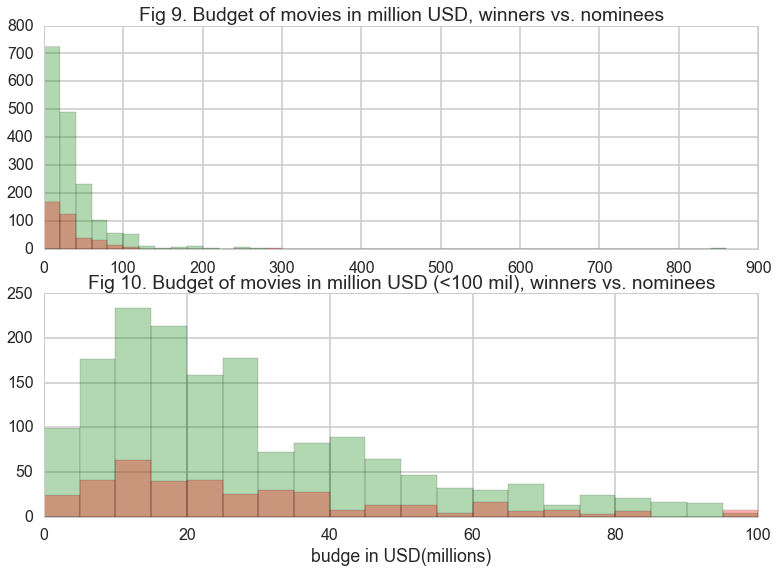

In [15]:
plt.figure(1)
plt.subplot(211)

dt = ultimatedf[ultimatedf.bp_w==False]['budget_USD'].dropna().values/1000000
dt_1 = ultimatedf[ultimatedf.bp_w==True]['budget_USD'].dropna().values/1000000
binwidth = 20
plt.hist(dt, bins=np.arange(min(dt), max(dt) + binwidth, binwidth), color='g', alpha=0.3);
plt.hist(dt_1, bins=np.arange(min(dt), max(dt) + binwidth, binwidth), color='r', alpha=0.3);
#plt.axvline(np.mean(ultimatedf.box_USD.dropna())/1000000, color='b', linewidth=3, label='mean')
#plt.axvline(np.median(ultimatedf.box_USD.dropna())/1000000, color='g', linewidth=3, label='median')
plt.title('Fig 9. Budget of movies in million USD, winners vs. nominees');

plt.subplot(212)
dt_3=dt_1[dt_1<=100]
dt_2=dt[dt<=100]
binwidth_1 = 5
#plt.hist(dt, bins=np.arange(min(dt), max(dt) + binwidth, binwidth), color='g', alpha=0.3);
plt.hist(dt_2, bins=np.arange(min(dt_2), max(dt_2) + binwidth_1, binwidth_1), color='g', alpha=0.3);
plt.hist(dt_3, bins=np.arange(min(dt_2), max(dt_2) + binwidth_1, binwidth_1), color='r', alpha=0.3);
#plt.axvline(np.mean(ultimatedf.box_USD.dropna())/1000000, color='b', linewidth=3, label='mean')
#plt.axvline(np.median(ultimatedf.box_USD.dropna())/1000000, color='g', linewidth=3, label='median')
plt.title('Fig 10. Budget of movies in million USD (<100 mil), winners vs. nominees');
plt.xlabel('budge in USD(millions)');


**Fig 11** plots four histograms. The first one is mean of the actors' age at the time of their nominations. The second one is the directors' age at the time of their nominations. The third shows the number of movies the actors are in upto now. The fourth shows the number of movies the directors directed upto now. 

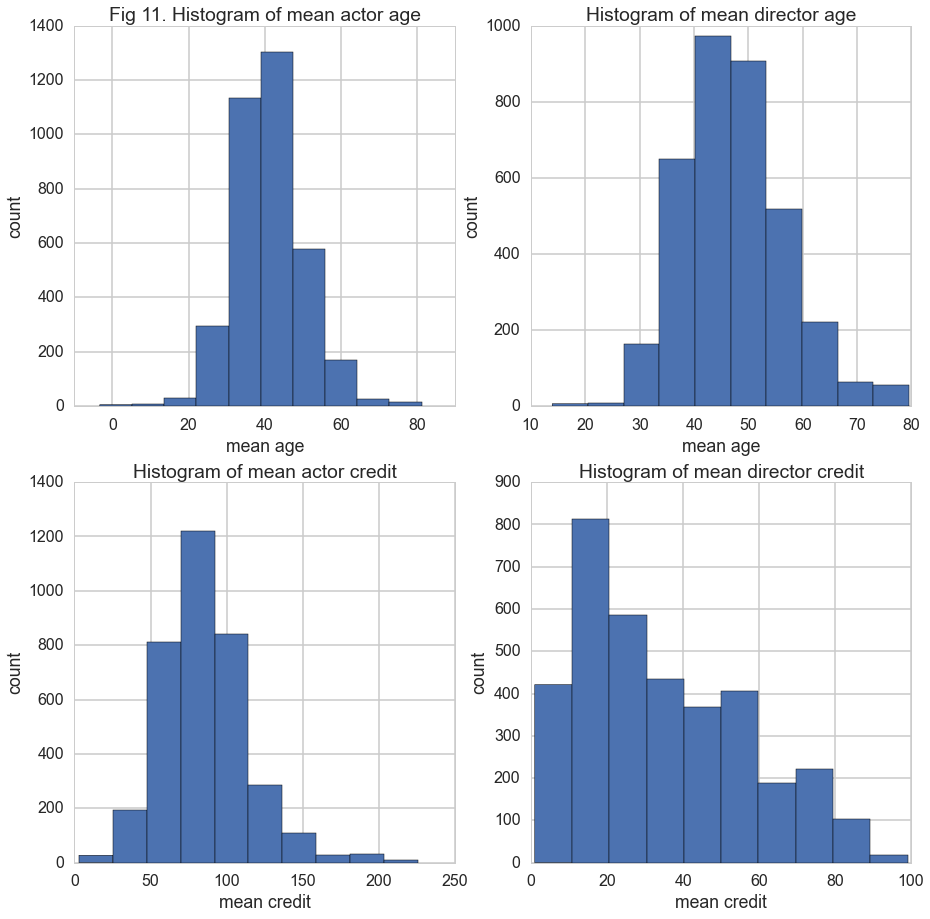

In [16]:
plt.figure(figsize=(15,15))
ax1 = plt.subplot(221)
ax1.hist(ultimatedf.A_mean_age)
ax1.set_title('Fig 11. Histogram of mean actor age')
ax1.set_xlabel('mean age')
ax1.set_ylabel('count')

ax2 = plt.subplot(222)
ax2.hist(ultimatedf.D_mean_age)
ax2.set_title('Histogram of mean director age')
ax2.set_xlabel('mean age')
ax2.set_ylabel('count');


ax3 = plt.subplot(223)
ax3.hist(ultimatedf.A_mean_credit)
ax3.set_title('Histogram of mean actor credit')
ax3.set_xlabel('mean credit')
ax3.set_ylabel('count')

ax4 = plt.subplot(224)
ax4.hist(ultimatedf.D_mean_credit)
ax4.set_title('Histogram of mean director credit')
ax4.set_xlabel('mean credit')
ax4.set_ylabel('count');

**Fig 12** plots four histograms. The first one is a comparison of the mean of the actors' age at the time of their nominations for the winners and the nominees. The second to fourth are similar comparisons. We used the same convention of using green for the nominees and red for the winners. The distributions of the two groups overlap, giving us no additional information on how to distinguish between the winners and the nominees.

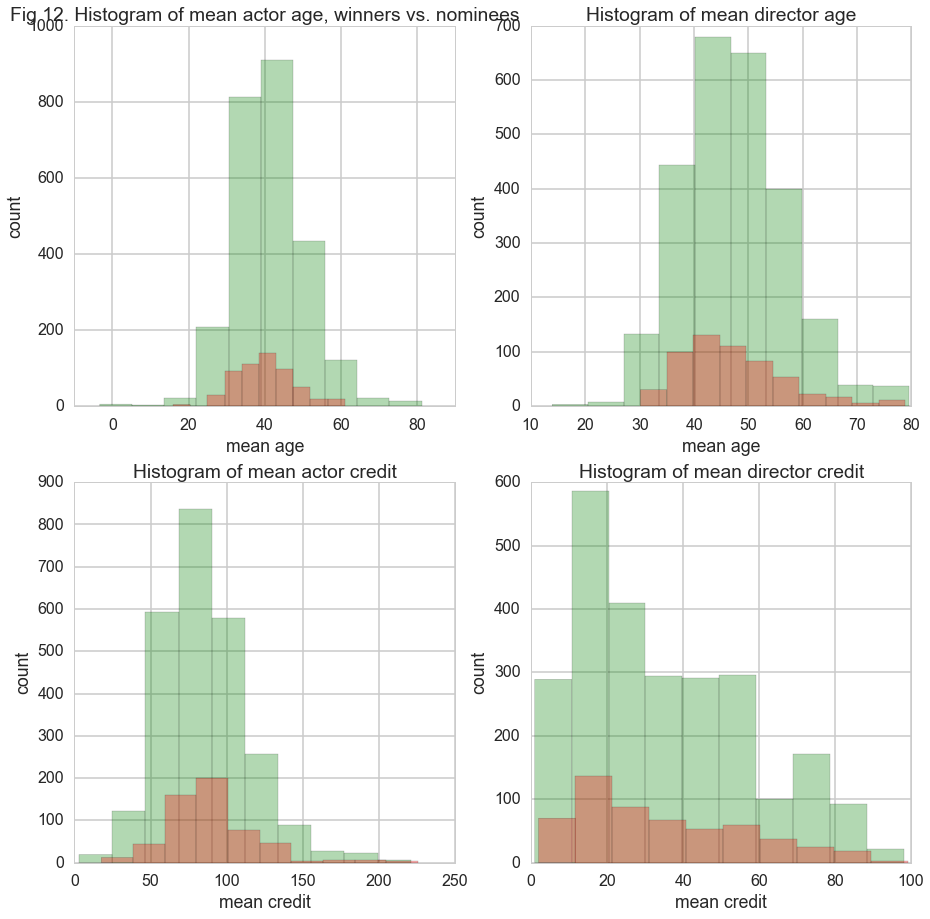

In [17]:
am_n=ultimatedf[ultimatedf.bp_w==False]['A_mean_age'].values
dm_n=ultimatedf[ultimatedf.bp_w==False]['D_mean_age'].values
am_w=ultimatedf[ultimatedf.bp_w==True]['A_mean_age'].values
dm_w=ultimatedf[ultimatedf.bp_w==True]['D_mean_age'].values

ac_n=ultimatedf[ultimatedf.bp_w==False]['A_mean_credit'].values
dc_n=ultimatedf[ultimatedf.bp_w==False]['D_mean_credit'].values
ac_w=ultimatedf[ultimatedf.bp_w==True]['A_mean_credit'].values
dc_w=ultimatedf[ultimatedf.bp_w==True]['D_mean_credit'].values


plt.figure(figsize=(15,15))
ax1 = plt.subplot(221)
ax1.hist(am_n, alpha=0.3, color='g')
ax1.hist(am_w, alpha=0.3, color='r')
ax1.set_title('Fig 12. Histogram of mean actor age, winners vs. nominees')
ax1.set_xlabel('mean age')
ax1.set_ylabel('count')

ax2 = plt.subplot(222)
ax2.hist(dm_n, alpha=0.3, color='g')
ax2.hist(dm_w, alpha=0.3, color='r')
ax2.set_title('Histogram of mean director age')
ax2.set_xlabel('mean age')
ax2.set_ylabel('count');


ax3 = plt.subplot(223)
ax3.hist(ac_n, alpha=0.3, color='g')
ax3.hist(ac_w, alpha=0.3, color='r')
ax3.set_title('Histogram of mean actor credit')
ax3.set_xlabel('mean credit')
ax3.set_ylabel('count')

ax4 = plt.subplot(224)
ax4.hist(dc_n, alpha=0.3, color='g')
ax4.hist(dc_w, alpha=0.3, color='r')
ax4.set_title('Histogram of mean director credit')
ax4.set_xlabel('mean credit')
ax4.set_ylabel('count');

The following graphs shows a scatter plot of the actor credit and the director credit in each genre. We can see that for each genre, the actor credits are higher than the director credits.

In [46]:
#ultimatedf.columns[25:46]

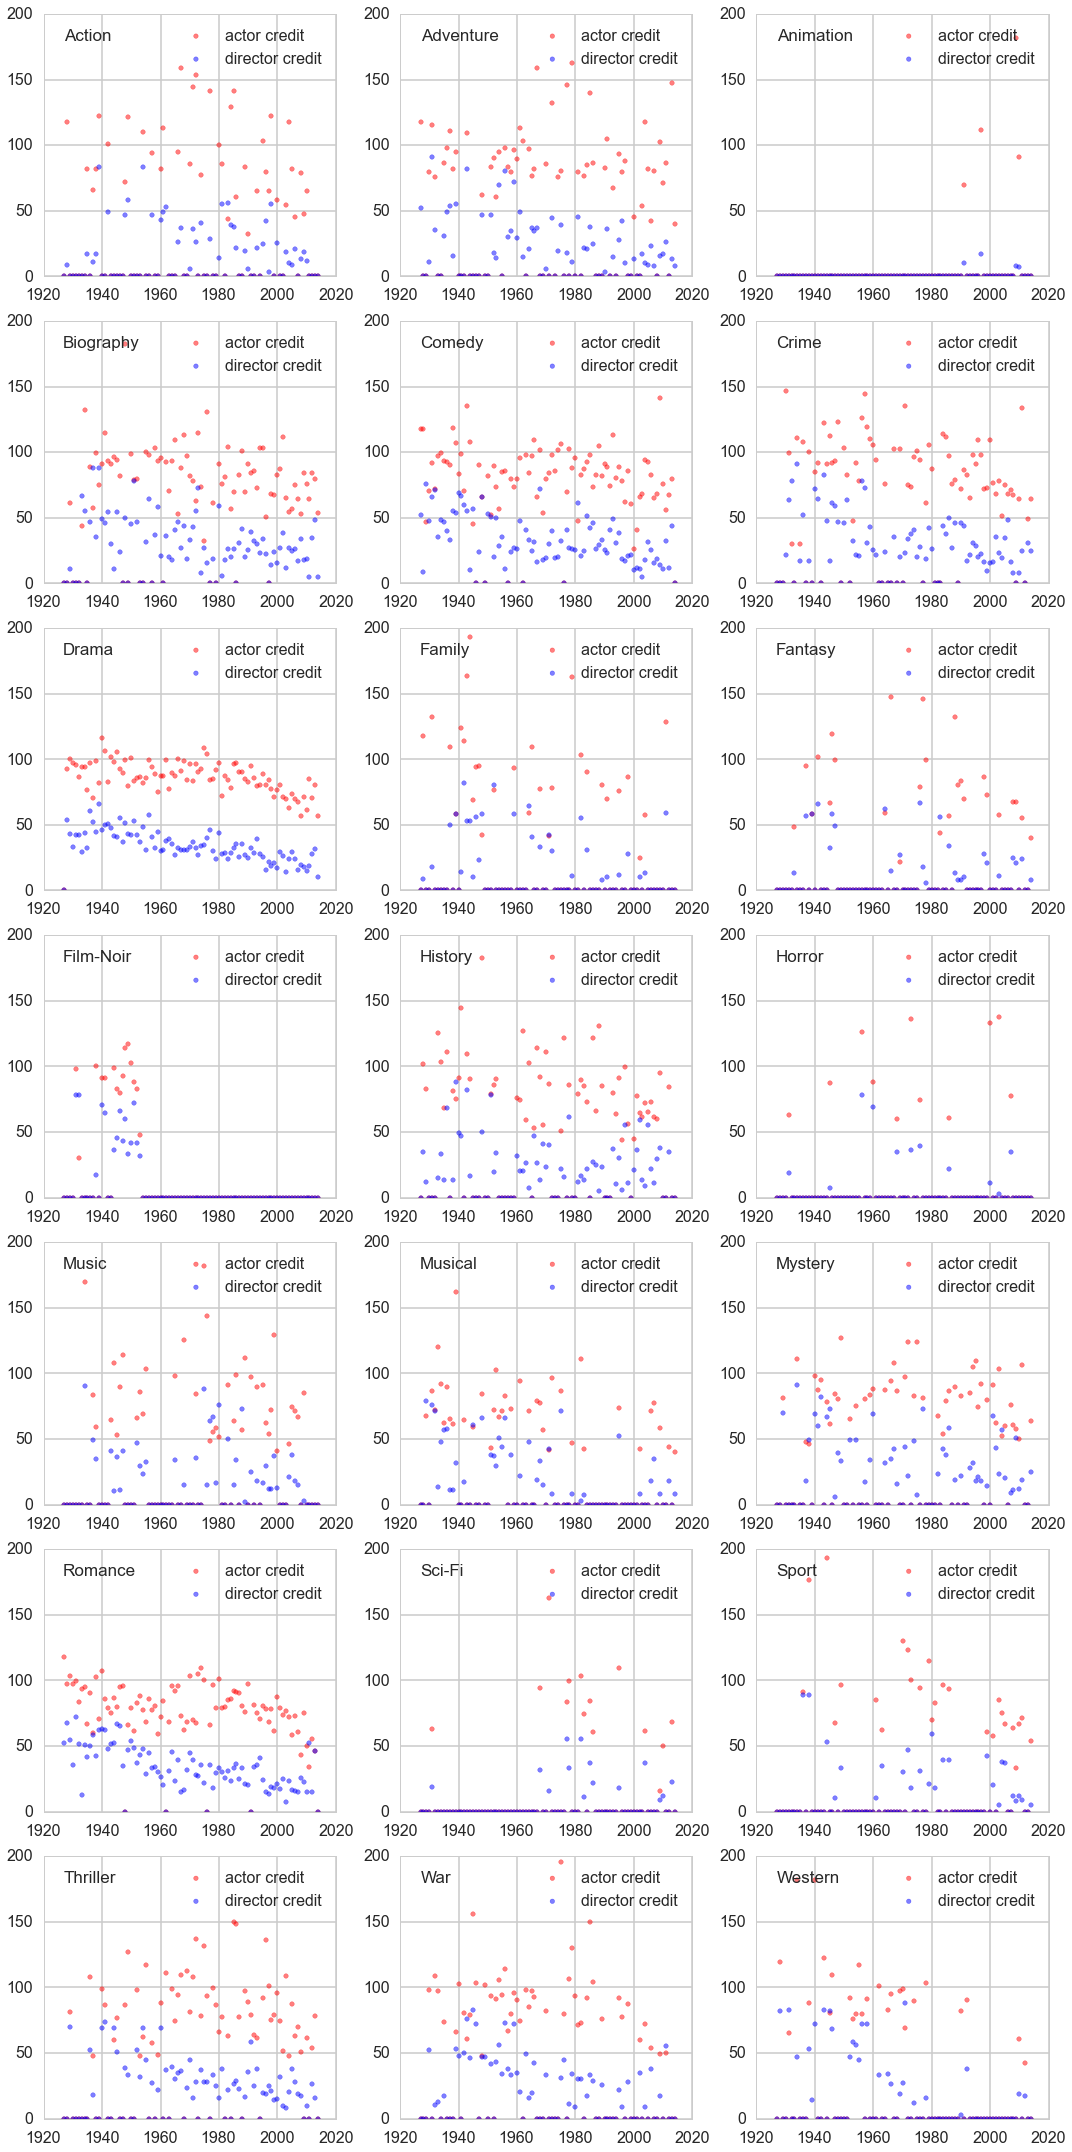

In [27]:
genres = list(ultimatedf.columns[25:46])
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(15, 30), tight_layout=True) 
for ax, genre in zip(axes.ravel(), genres):
    subtab = ultimatedf[ultimatedf[genre]==True]
    by_year = subtab.groupby('Year')
    years = list(set(ultimatedf['Year']))
    A_credit_mean = by_year.apply(lambda x: np.average(x.A_mean_credit))
    A_credit_mean = by_year.apply(lambda x: np.average(x.A_mean_credit))
    for y in years:
        if y not in list(A_credit_mean.index):
            A_credit_mean[y] = 0
            
    D_credit_mean = by_year.apply(lambda x: np.average(x.D_mean_credit))
    for y in years:
        if y not in list(D_credit_mean.index):
            D_credit_mean[y] = 0
    ax.set_ylim([0, 200])
    ax.scatter(A_credit_mean.index, A_credit_mean, color='r', alpha=0.5,label='actor credit')
    ax.scatter(D_credit_mean.index, D_credit_mean, color='b', alpha=0.5,label='director credit')
    ax.legend()
    ax.text(years[0], 180, genre, fontsize=17)

**Fig 13** shows the percentage of genres for all the nominated movies, with the highest count on top. We see that the most common type of movies is drama and the least common is animation. Note that a movie can have more than one genre, which is why the percentage of all the genres doesn't add up to 1.

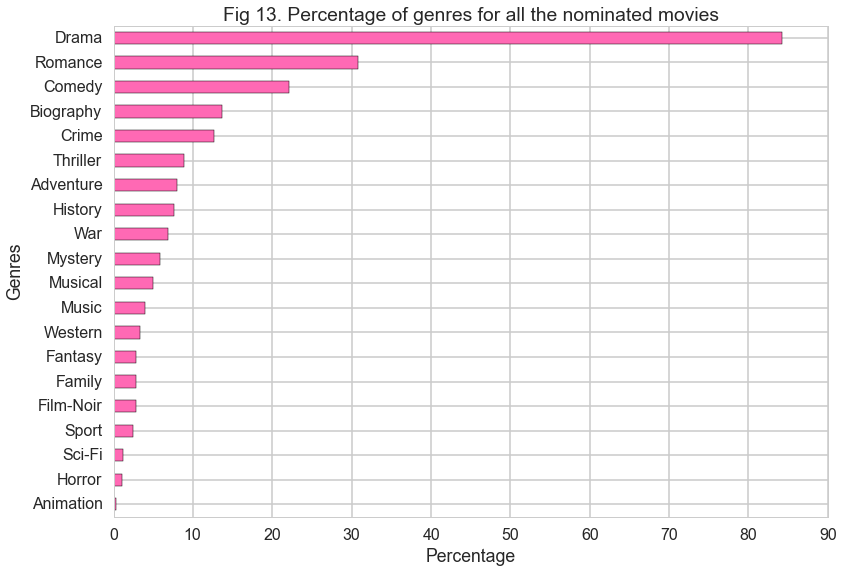

In [38]:
genrefrac = ultimatedf.mean(axis=0)*100
## Only get the genres
genrefrac = genrefrac[17:37]
genrefrac.sort()
genrefrac.plot(kind='barh', color='hotpink').set_ylabel("Genres");
plt.xlabel('Percentage');
plt.title('Fig 13. Percentage of genres for all the nominated movies')
plt.legend().set_visible(False);

**Fig 14** compares the genre distributions between the nominees and the winners. Again, the winners are the reds and the nominees are the greens. The bar charts looks similar, only that the winners have no movies in fantacy, horror, science fiction or animation. However, this does not tell us much as these genres have so few movies to begin with.

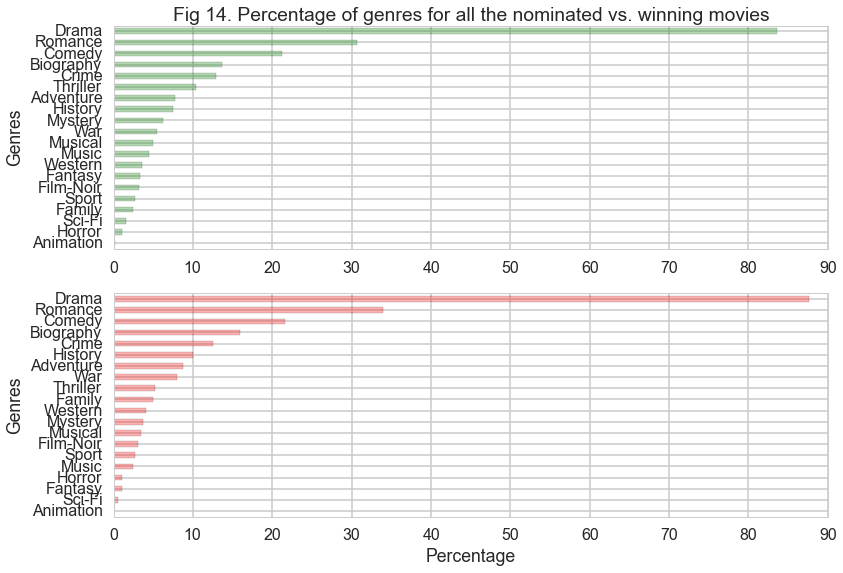

In [39]:
plt.figure(1)
plt.subplot(211)
ultimatedf_1=ultimatedf[ultimatedf.bp_w==False]
ultimatedf_2=ultimatedf[ultimatedf.bp_w==True]
genrefrac_1 = ultimatedf_1.mean(axis=0)*100
genrefrac_2 = ultimatedf_2.mean(axis=0)*100
#print len(genrefrac)
## Only get the genres
genrefrac_1 = genrefrac_1[17:37]
genrefrac_2 = genrefrac_2[17:37]
genrefrac_1.sort()
genrefrac_2.sort()
genrefrac_1.plot(kind='barh', color='g',alpha=0.3).set_ylabel("Genres");
plt.title('Fig 14. Percentage of genres for all the nominated vs. winning movies')
plt.subplot(212)
genrefrac_2.plot(kind='barh', color='r',alpha=0.3).set_ylabel("Genres");
plt.xlabel('Percentage');

plt.legend().set_visible(False);

Next, we plot two maps. The first is a map of the directors' birth places, with each point showing a director. We see that most of the directors are from the US or Eurpoe. 
The second map shows the actors' birth places, with each point marking an actor. This map shows the same pattern as the director's map.

In [44]:
mapdf = pd.read_csv('merge.csv')
#print mapdf.columns
directorinfo = mapdf.drop_duplicates(subset=['D_name', 'D_birthplace'])
directorinfo.shape

(493, 80)

In [ ]:
#from geopy.geocoders import Nominatim
geolocator = Nominatim()
from geopy import geocoders  
#gn = geocoders.GeoNames(username='michellefyy', timeout=5)
output = {}
output['name'] = []
output['long'] = []
output['lat'] = []
for _, row in tqdm(directorinfo.iterrows(), leave=True):
    city = row.D_birthplace#.split(',')[0]
    temp = geolocator.geocode(city, timeout=5)
    #temp = gn.geocode("Paris")
    output['name'].append(row['D_name'])
    if temp != None: 
        output['long'].append(temp.longitude)
        output['lat'].append(temp.latitude)
    else:
        output['long'].append(None)
        output['lat'].append(None)

In [20]:
df = pd.DataFrame(output)

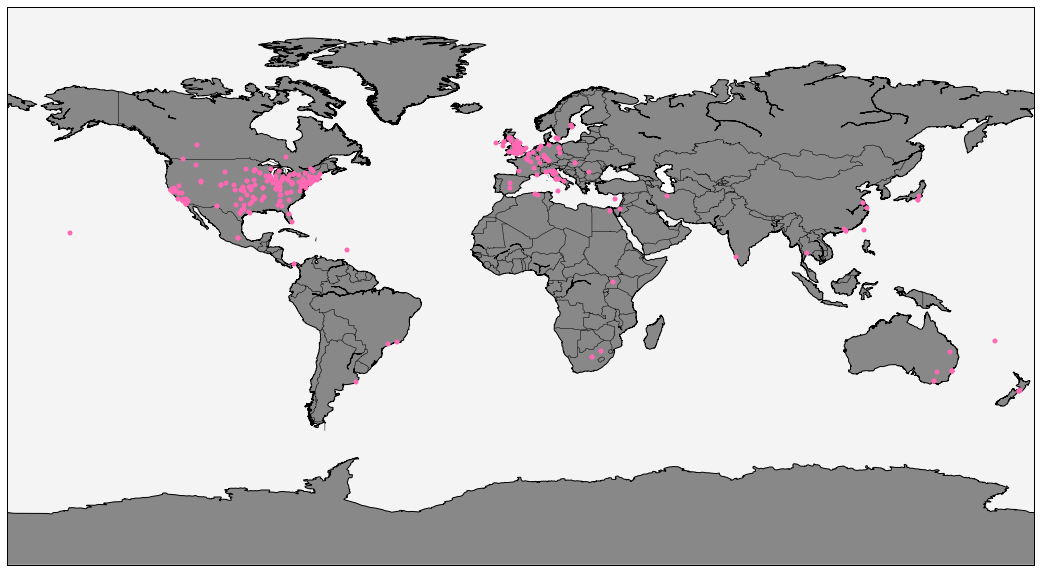

In [28]:
from mpl_toolkits.basemap import Basemap

# Create a figure of size (i.e. pretty big)
fig = plt.figure(figsize=(20,10))

# Create a map, using the Gall–Peters projection, 
map = Basemap(projection='gall',
              # with low resolution,
              resolution = 'l',
              # And threshold 100000
              area_thresh = 100000.0,
              # Centered at 0,0 (i.e null island)
              lat_0=0, lon_0=0)

# Draw the coastlines on the map
map.drawcoastlines()

# Draw country borders on the map
map.drawcountries()

# Fill the land with grey
map.fillcontinents(color = '#888888')

# Draw the map boundaries
map.drawmapboundary(fill_color='#f4f4f4')

# Define our longitude and latitude points
# We have to use .values because of a wierd bug when passing pandas data
# to basemap.
x,y = map(df['long'].values, df['lat'].values)

# Plot them using round markers of size 6
map.plot(x, y, 'ro', markersize=5, color='hotpink')

# Show the map
plt.show()

In [29]:
actorinfo = mapdf.drop_duplicates(subset=['A_name', 'A_birthplace'])
actorinfo.shape

(1371, 79)

In [31]:
#from geopy.geocoders import Nominatim
geolocator = Nominatim()
from geopy import geocoders  
#gn = geocoders.GeoNames(username='michellefyy', timeout=5)
output = {}
output['name'] = []
output['long'] = []
output['lat'] = []
for _, row in tqdm(directorinfo.iterrows(), leave=True):
    city = row.A_birthplace#.split(',')[0]
    temp = geolocator.geocode(city, timeout=7)
    #temp = gn.geocode("Paris")
    output['name'].append(row['A_name'])
    if temp != None: 
        output['long'].append(temp.longitude)
        output['lat'].append(temp.latitude)
    else:
        output['long'].append(None)
        output['lat'].append(None)

492it [03:52,  2.35it/s]


In [35]:
df = pd.DataFrame(output)
#df.head(20)

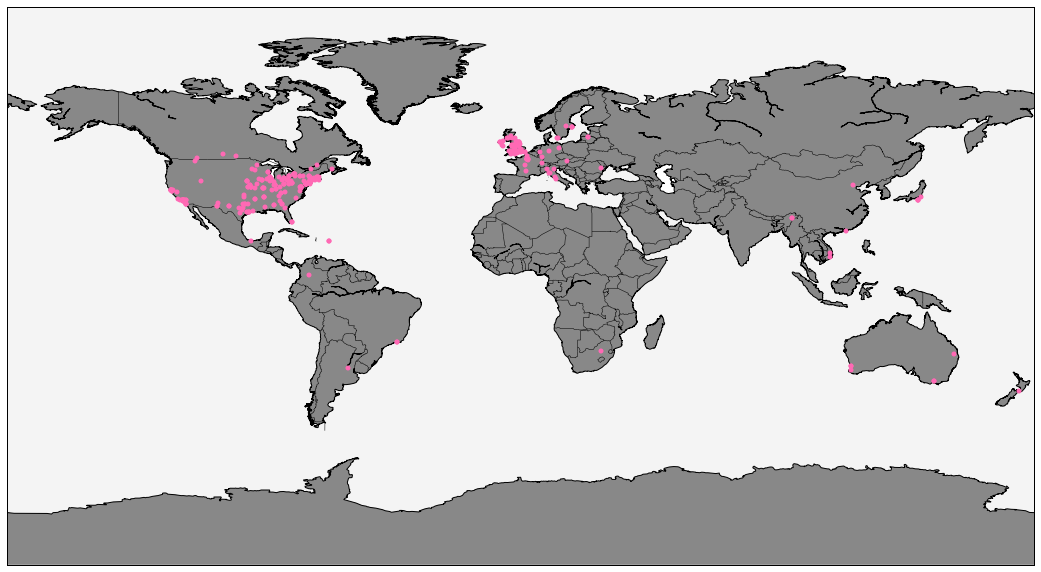

In [33]:
from mpl_toolkits.basemap import Basemap

# Create a figure of size (i.e. pretty big)
fig = plt.figure(figsize=(20,10))

# Create a map, using the Gall–Peters projection, 
map = Basemap(projection='gall',
              # with low resolution,
              resolution = 'l',
              # And threshold 100000
              area_thresh = 100000.0,
              # Centered at 0,0 (i.e null island)
              lat_0=0, lon_0=0)

# Draw the coastlines on the map
map.drawcoastlines()

# Draw country borders on the map
map.drawcountries()

# Fill the land with grey
map.fillcontinents(color = '#888888')

# Draw the map boundaries
map.drawmapboundary(fill_color='#f4f4f4')

# Define our longitude and latitude points
# We have to use .values because of a wierd bug when passing pandas data
# to basemap.
x,y = map(df['long'].values, df['lat'].values)

# Plot them using round markers of size 6
map.plot(x, y, 'ro', markersize=5, color='hotpink')

# Show the map
plt.show()